In [1]:
import numpy as np
import pulse2percept as p2p
import p2pspatial
import skimage.filters as skif
import skimage.draw as skid
import skimage.transform as skit

%matplotlib inline
import matplotlib.pyplot as plt

2017-11-11 18:57:43,686 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
class SpatialSimulation(p2p.Simulation):

    def set_ganglion_cell_layer(self):
        pass

    def pulse2percept(self, electrode):
        cs = self.implant[electrode].current_spread(self.ofl.gridx, sim.ofl.gridy,
                                                    layer='OFL')
        ecs = self.ofl.current2effectivecurrent(cs)
        return cs, ecs

In [3]:
argus = p2p.implants.ArgusII()

In [4]:
sim = SpatialSimulation(argus)

In [5]:
sampling = 100
sim.set_optic_fiber_layer(sampling=sampling, decay_const=5)

2017-11-11 18:57:43,853 [pulse2percept.retina] [INFO] Loading file ".\retina_RE_s100_a501_r801_6000x4000.npz".


In [6]:
cs, ecs = sim.pulse2percept('B3')

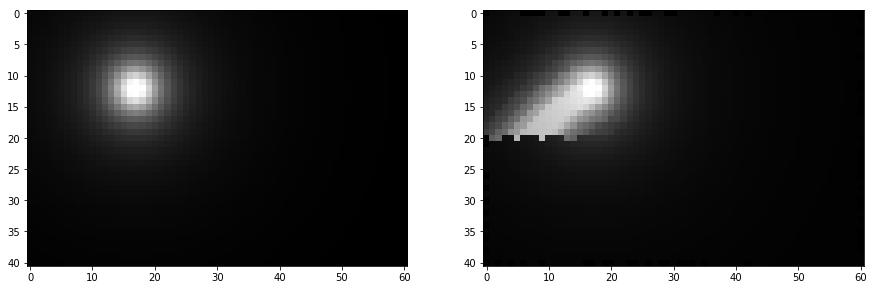

In [7]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(cs, cmap='gray')

plt.subplot(122)
plt.imshow(ecs, cmap='gray')

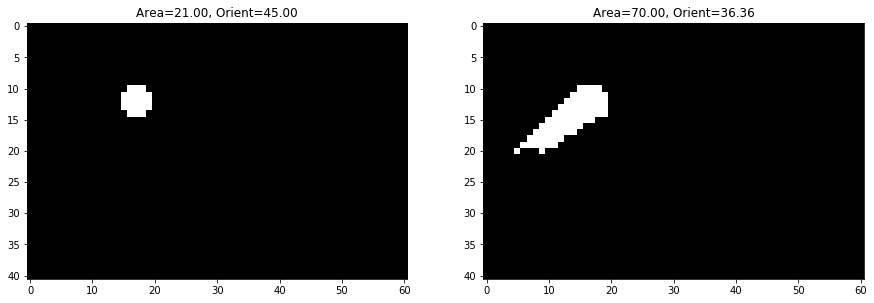

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
img = (cs > skif.threshold_minimum(cs)).astype(np.uint8)
plt.imshow(img, cmap='gray')
props = p2pspatial.get_region_props(img)
plt.title('Area=%.2f, Orient=%.2f' % (props.area, np.rad2deg(props.orientation)))

plt.subplot(122)
img = (ecs > skif.threshold_minimum(ecs)).astype(np.uint8)
plt.imshow(img, cmap='gray')
props = p2pspatial.get_region_props(img)
plt.title('Area=%.2f, Orient=%.2f' % (props.area, np.rad2deg(props.orientation)))

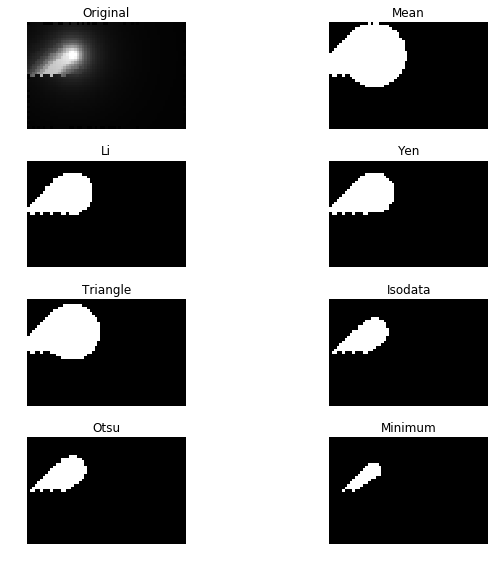

In [9]:
fig, ax = skif.try_all_threshold(ecs, figsize=(10, 8), verbose=False)

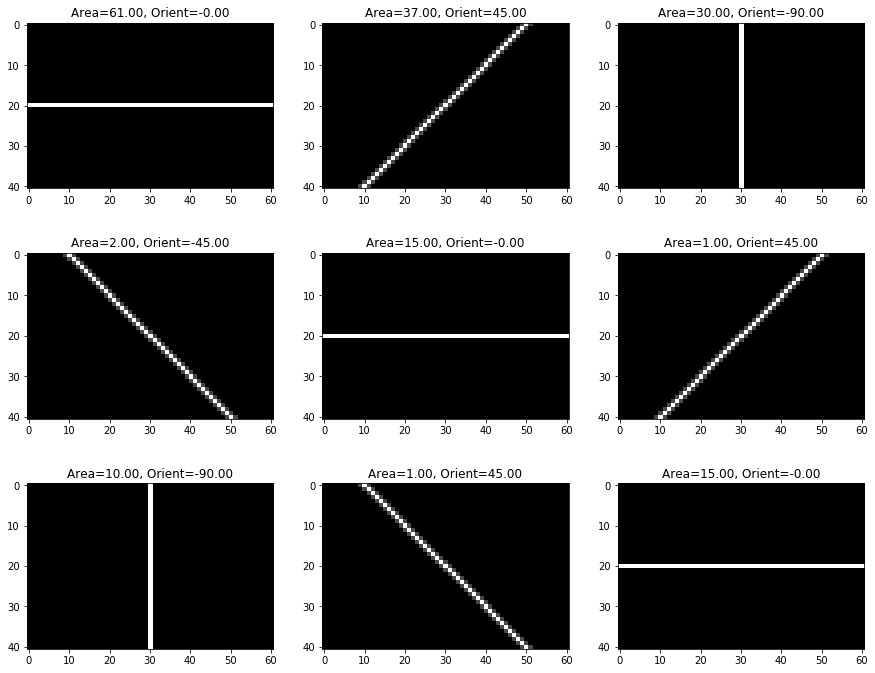

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
img = np.zeros_like(sim.ofl.gridx)
rr, cc, val = skid.line_aa(img.shape[0] // 2, 0, img.shape[0] // 2, img.shape[1] - 1)
img[rr, cc] = val

for i, ax in enumerate(axes.ravel()):
    newimg = skit.rotate(img, i * 45)
    props = p2pspatial.get_region_props(newimg)
    if isinstance(props, list):
        props = props[-1]
    ax.imshow(newimg, cmap='gray')
    ax.set_title('Area=%.2f, Orient=%.2f' % (props.area, np.rad2deg(props.orientation)))